# House Prices: Advanced Regression Techniques

<a id="0"></a>
### [第一步:定义并理解问题](#1)
### [第二步:获取数据](#2)
### [第三步:观察并理解数据](#3)
### [第四步:数据清理&数据可视化](#111)
### [第五步:数据需求&特征工程](#222)
### [第六步:选取模型](#333)
### [第七步:测试训练集&测试集](#444)
### [第八步:衡量结果](#555)

## 一、定义并理解问题<a id="1"></a>

<a id="0"></a>
> 1.[背景信息](#4)<br>
> 2.[思路说明](#5)<br>
> 3.[重要提示](#6)<br>
> 4.[公式详情](#7)

### 1.背景信息<a id="4"></a>

当购房者被问到什么才是自己理想的房子时，他们通常不会考虑到只有专业人员才能了解的，复杂且细致的影响因素。例如，天花板的高度或是房子到一个东西方向公路的距离。但是从本次预测采用的两个数据集中，我们会看到更多能够衡量并影响房价的因素。因此，我们可以对于房价确定这一问题有个更为全面和深层的认识，而不仅仅是停留在大众普遍对于房价影响因素的认识层面上，如房间卧室数目多少或者是否有白色尖桩篱栅等。

### 2.思路说明<a id="5"></a>

在本次预测中，我们有79个解释变量来描述在Ames市的住宅的每一个细致的方面，其中不仅有常见的住宅面积大小，大概位置，房间的数目，建造的时间和总体的质量等，也有着例如墙面的材料，屋顶的形状，是否有壁炉以及门前道路情况等的详细信息。我们一共有两个数据集，分别是训练集train和测试集test。在预测的过程中，我们利用已知房价的训练集来初步建立一些能够预测房价的 regression模型，通过不断的检验和完善模型以找到一个误差较小较为准确且普适的模型。最后我们利用这些模型来根据测试集中的数据预测对应的房价。关于如何去衡量最后准确性的标准，我们采取了root mean square error这一衡量手段，即通过观察测试集中数据得到的预测房价与真实价格的root mean square error来描述模型结果的准确性。

### 3.重要提示<a id="6"></a>

同时，对于房价的数值采用log值使得我们在预测价格不同且相差巨大的房子时，能够忽略因价格过大或过小而对误差大小产生的影响。

### 4.公式详情<a id="7"></a>

$$rmse=(\sum_{i=0}^\infty \frac{(log(y_pred） - log(y))^2}{N}) ^ {(1/2)}$$

## 二、获取数据<a id="2"></a>

<a id="0"></a>
> 第一步：[导入数据集](#8)<br>
> 第二步：[命名数据集](#9)<br>
> 第三步：[观察数据集](#10)<br>


> * 首先，我们将test和train两个数据集上传到Jupyter Note的 Homepage，并将其中的数据导入至此note中读取。同时利用pandas（pd）规定在展示数据时，可显示的最大列数为100，以保证可以看到每一列的内容。<br>
> * 接下来，我们将两个数据集重新命名为train_df和test_df（不能随意命名，以防在后来会混乱）<br>
> * 最后，我们用 .shape来观察一下两个数据集的形状以及其中所含数据的多少<br>

### 1.导入数据集<a id="8"></a>

In [132]:
import pandas as pd
pd.options.display.max_columns = 100 #展示的列数最多为100

### 2.命名数据集<a id="9"></a>

In [133]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv('test.csv')

### 3.观察数据集<a id="10"></a>

In [134]:
train_df.shape,test_df.shape#先看一下训练集和测试集的大小-行、列数

((1460, 81), (1459, 80))

## 三、 观察并理解数据<a id="3"></a>

<a id="0"></a>
> 1.[观察整体数据](#11)<br>
> 2.[观察房价](#12)<br>
> 3.[观察Lot Area, GrLivArea](#13)<br>
> 4.[其他](#14)

### 1.观察整体数据<a id="11"></a>

> * 观察data description文件中对于数据的基本介绍，理解每一个数据的实际含义。根据自身经验，初步预计不同变量对价格影响的程度。<br>
> * 从sklear导入matplotlib和numpy模型，以便后续进行数据计算并做出图表<br>
> * 观察数据类别，用.columns直接看到所有数据的名称；用.despribe()看数据的详细信息。
> * 对影响房价的较为重要的变量进行可视化处理，观察其特征。

#### Packages used: matplotlib, numpy

In [135]:
import matplotlib.pyplot as plt #用matplotlib数据包
import numpy as np #启用numpy

##### 通过看名称，观察数据都有什么分类

In [136]:
train_df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### 观察各个数据分类中，数据大概是什么样

In [137]:
train_df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***运用describe()得到房价的最小值，最大值，平均数等等***

In [138]:
train_df[ 'SalePrice' ] .describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [139]:
train_df[ 'MSZoning' ] .describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

In [140]:
train_df.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

### 2.观察房价<a id="12"></a>

***将房价以柱状图的形式表示出来，使得数据的特征更加清晰。
导入数据包matplotlib（plt），横坐标为房价，纵坐标为数量***

Text(0.5,1,'Histogram of House Price')

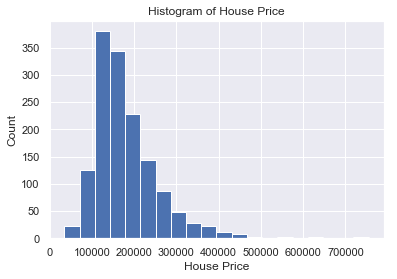

In [141]:
plt.hist(train_df['SalePrice'] ,bins=20)  # 用matplotlib.pyplot包画图，hist是柱状图
plt.xlabel('House Price') 
plt.ylabel('Count')  
plt.title('Histogram of House Price')  # 图的名称为...

***考虑到在最后检验结果时需要用房价的log值，我们在数据集中加入一列新的数据-SalesPrice_log，并画出其柱状图图像***

In [142]:
train_df[ 'SalePrice_log' ] = np. log1p(train_df['SalePrice']) 
# 重要：取saleprice的log值，为避免saleprice取到0时log0无意义，
# 则将SalePrice的log值（SalePrice_log）取为log（1+saleprice）
# 即为log1p(train_df['SalePrice']) 

(array([  5.,   0.,   4.,   8.,   8.,  46.,  57., 127., 228., 242., 238.,
        162., 134.,  86.,  61.,  29.,  15.,   4.,   4.,   2.]),
 array([10.46027076, 10.61398094, 10.76769112, 10.9214013 , 11.07511148,
        11.22882166, 11.38253184, 11.53624202, 11.6899522 , 11.84366238,
        11.99737256, 12.15108274, 12.30479292, 12.4585031 , 12.61221328,
        12.76592345, 12.91963363, 13.07334381, 13.22705399, 13.38076417,
        13.53447435]),
 <a list of 20 Patch objects>)

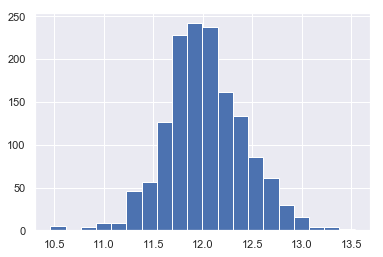

In [143]:
plt.hist(train_df[ 'SalePrice_log' ],bins=20) 

### 3.观察GrLivArea<a id="13"></a>

### GrLivArea

***GrLivArea是房子中不包括地下室的所有面积-也是在观察分析data despription之后发现的较为重要的变量***

Text(0,0.5,'Grliv Area')

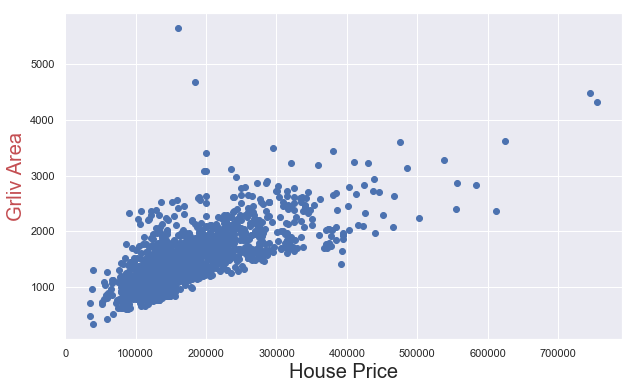

In [144]:
f, ax = plt.subplots(1,1,figsize=(10,6))
plt.scatter(train_df['SalePrice'], train_df['GrLivArea'])
plt.xlabel('House Price',size = 20)
plt.ylabel('Grliv Area',size = 20,color = 'r')

***为了求Lot Area 与 sale price的线性关系，我们利用numpy as np并将想要求得的直线命名为fit***

In [145]:
fit = np.polyfit(train_df['GrLivArea'],train_df['SalePrice'],1)

***house price = a*GrLivArea+ b***

In [146]:
fit[0] #斜率

107.13035896582518

In [147]:
fit[1] #截距

18569.025856487286

In [148]:
yfit = [n*fit[0] for n in train_df['GrLivArea']] + fit[1] #list comprehension

In [149]:
yfit

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

Text(0,0.5,'SalePrice')

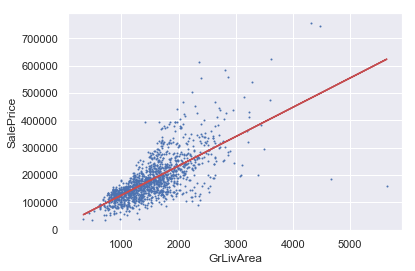

In [150]:
plt.plot(train_df['GrLivArea'],yfit ,color = 'r') #r=red, #直线图
plt.scatter(train_df['GrLivArea'],train_df['SalePrice'],1)
plt.xlabel( 'GrLivArea')
plt.ylabel('SalePrice')

***添加一个新的变量名称：total square, 数值等于将 1stFlrSF，2ndFlrSF和TotalBsmtSF相加的总和。***

In [151]:
train_df['totalSF'] = train_df['1stFlrSF'] + train_df['2ndFlrSF'] + train_df['TotalBsmtSF']

### 4.其他<a id="14"></a>

### (1) Overall Quality

***运用seaborn中的boxplot来展现Sale Price与Overall Quality的关系。***

In [152]:
import seaborn as sns

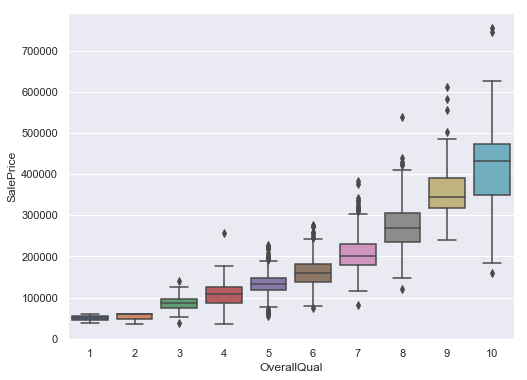

In [153]:
var = 'OverallQual'
data = pd.concat([train_df[ 'SalePrice' ], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)

***由图像可知，显而易见，sale price和overall quality呈正相关关系，即随着OverallQuality增加，SalePrice也随之增长。此外，Overall Quality高的房屋中更容易出现outliers异常值***

### (2)Year Built

***用boxplot图表展示房子建造的时间和价格的变化关系，如下：***

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

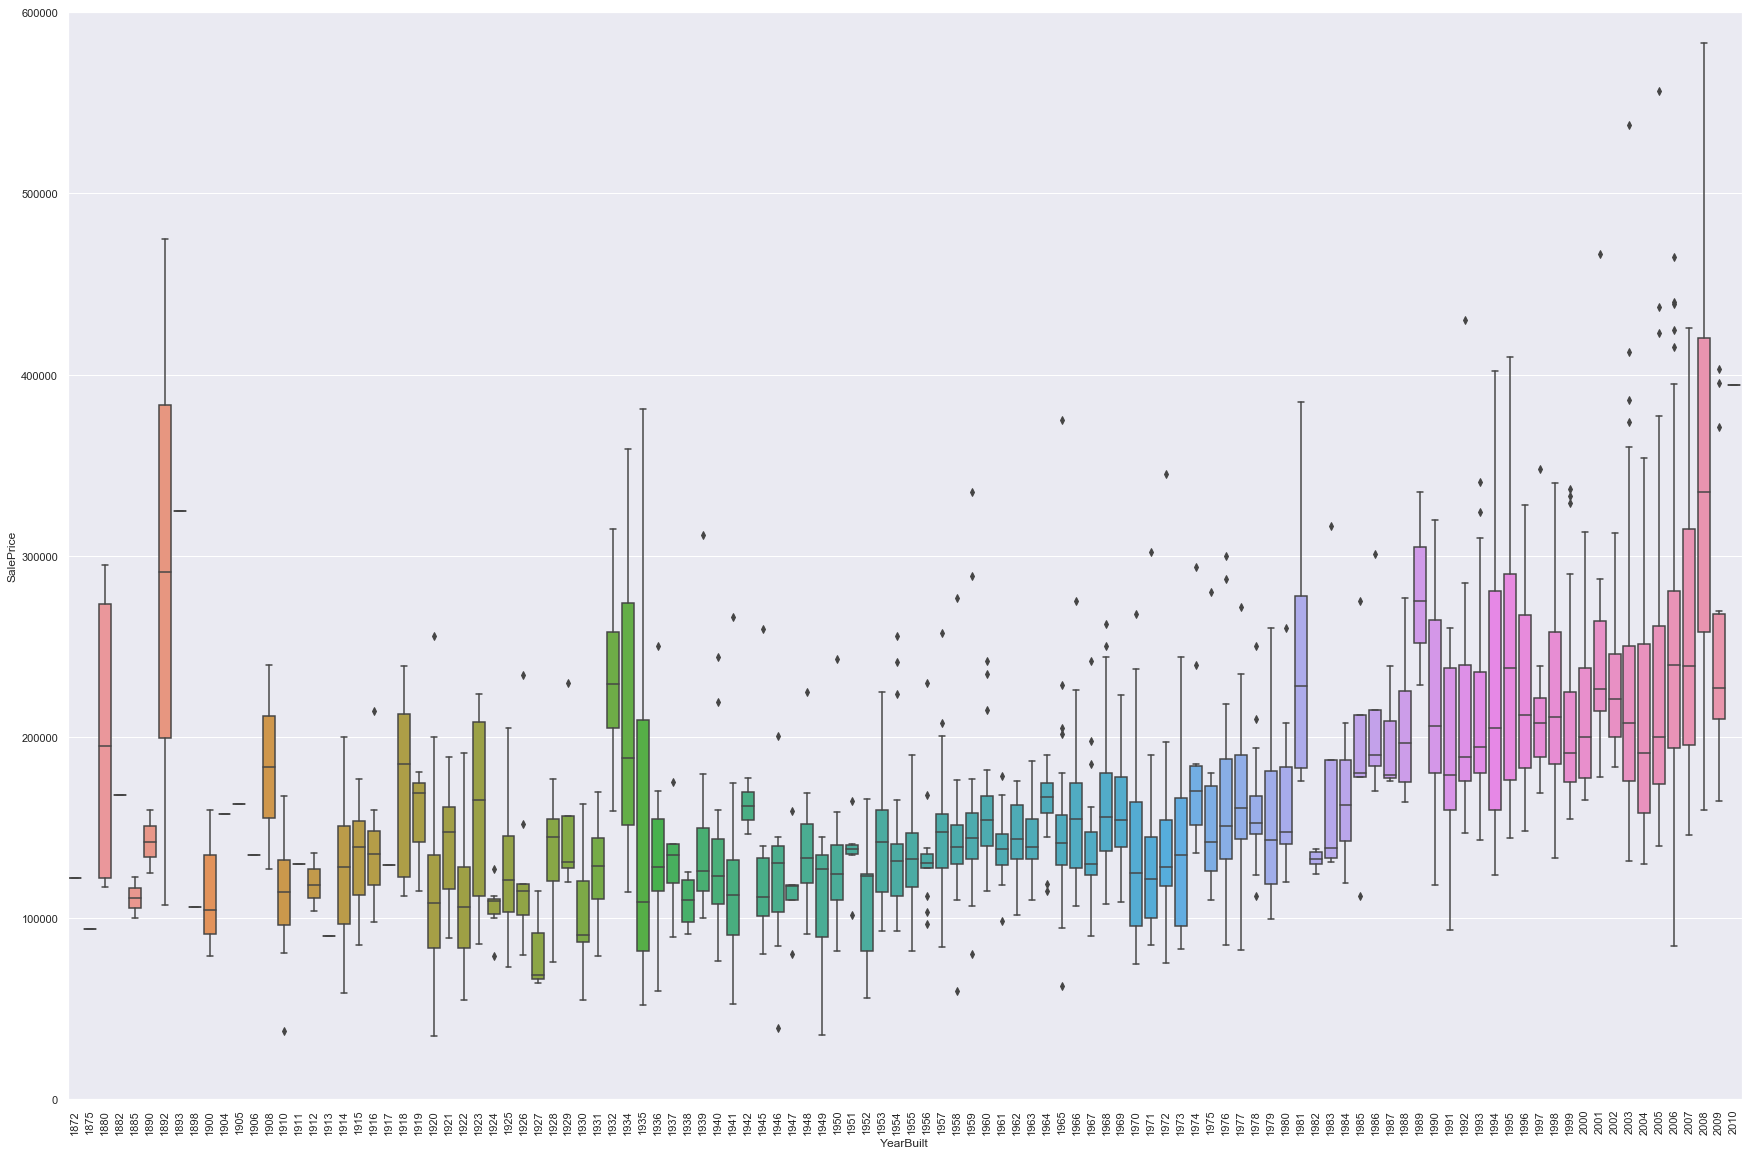

In [154]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(30,20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=600000)
plt.xticks(rotation=90)

***由图像可知，虽然总体上升趋势并不是十分明显，但可以看出大约在1965年之后房价是随着建造时间的推后而逐渐上升的***

## 四、数据清理&数据可视化<a id="111"></a>

<a id="0"></a>
> 1.[做出HeatMap图像](#119)<br>
> 2.[观察并初步处理空缺值](#129)<br>
> 3.[填充空缺数据](#139)<br>
> 4.[清理数据格式](#149)<br>
> 5.[LabelEncoder处理数据](#159)<br>
> 6.[OneHotEncoder处理数据](#169)<br>
> 7.[train test split](#179)<br>

> * 首先，我们使用 .head() 和 .columns() 来观察数据的分类名称，并对开始对数据进行初步的清理工作-删除掉与房价无关的房子ID这一列的数据；再利用Heatmap的图像来表示一些数据与房价的相关性情况，以便后续对重要的数据进行更为详细的分析。<br>
> * 其次，我们将先找出空缺值并观察分析它们的特征以及缺失原因，然后对空缺值根据数据缺失的不同类型进行分类填充。<br>
> * 接下来，我们要统一数据类型，通过将数据类型是文字的部分转换成对应的数值形式来为下一步进行模型建立和计算做好准备工作。<br>
> * 最后，我们用LabelEncoder和OnehotEncoder来进一步分析处理数据<br>

### 1.做出HeatMap图像<a id="119"></a>

***观察数据分类名称***

In [155]:
train_df.head() #head看前面几行

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,totalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109016,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317171,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849405,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429220,3343


In [156]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

***初步清理数据***

In [157]:
train_df.drop(columns=['Id'], axis=1,inplace=True) #id 与房价没有直接的关系，用panda里面的drop，删除掉ID这一列

In [158]:
train_df.tail()#确认一下ID这一列已经没有了 ，tail是看后面几行

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,totalSF
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,12.072547,2600
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,12.254868,3615
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,12.493133,3492
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,11.864469,2156
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500,11.901590,2512


***用DataFrame分析数据相关性***

In [159]:
df_1 = pd.DataFrame([[1,1,1],[3,3,4],[5,5,5]])
df_1.corr() #求相关性 correlation

,0,1,2
0,1.000000,1.000000,0.960769
1,1.000000,1.000000,0.960769
2,0.960769,0.960769,1.000000


In [160]:
df_1 #看之前的df 1矩阵是什么样

,0,1,2
0,1,1,1
1,3,3,4
2,5,5,5


***画出heatmap，看出每个变量和价格的相关性，因此可以看出不同变量对价格影响的重要程度***

Text(0.5,1,'Heatmap of all the Features')

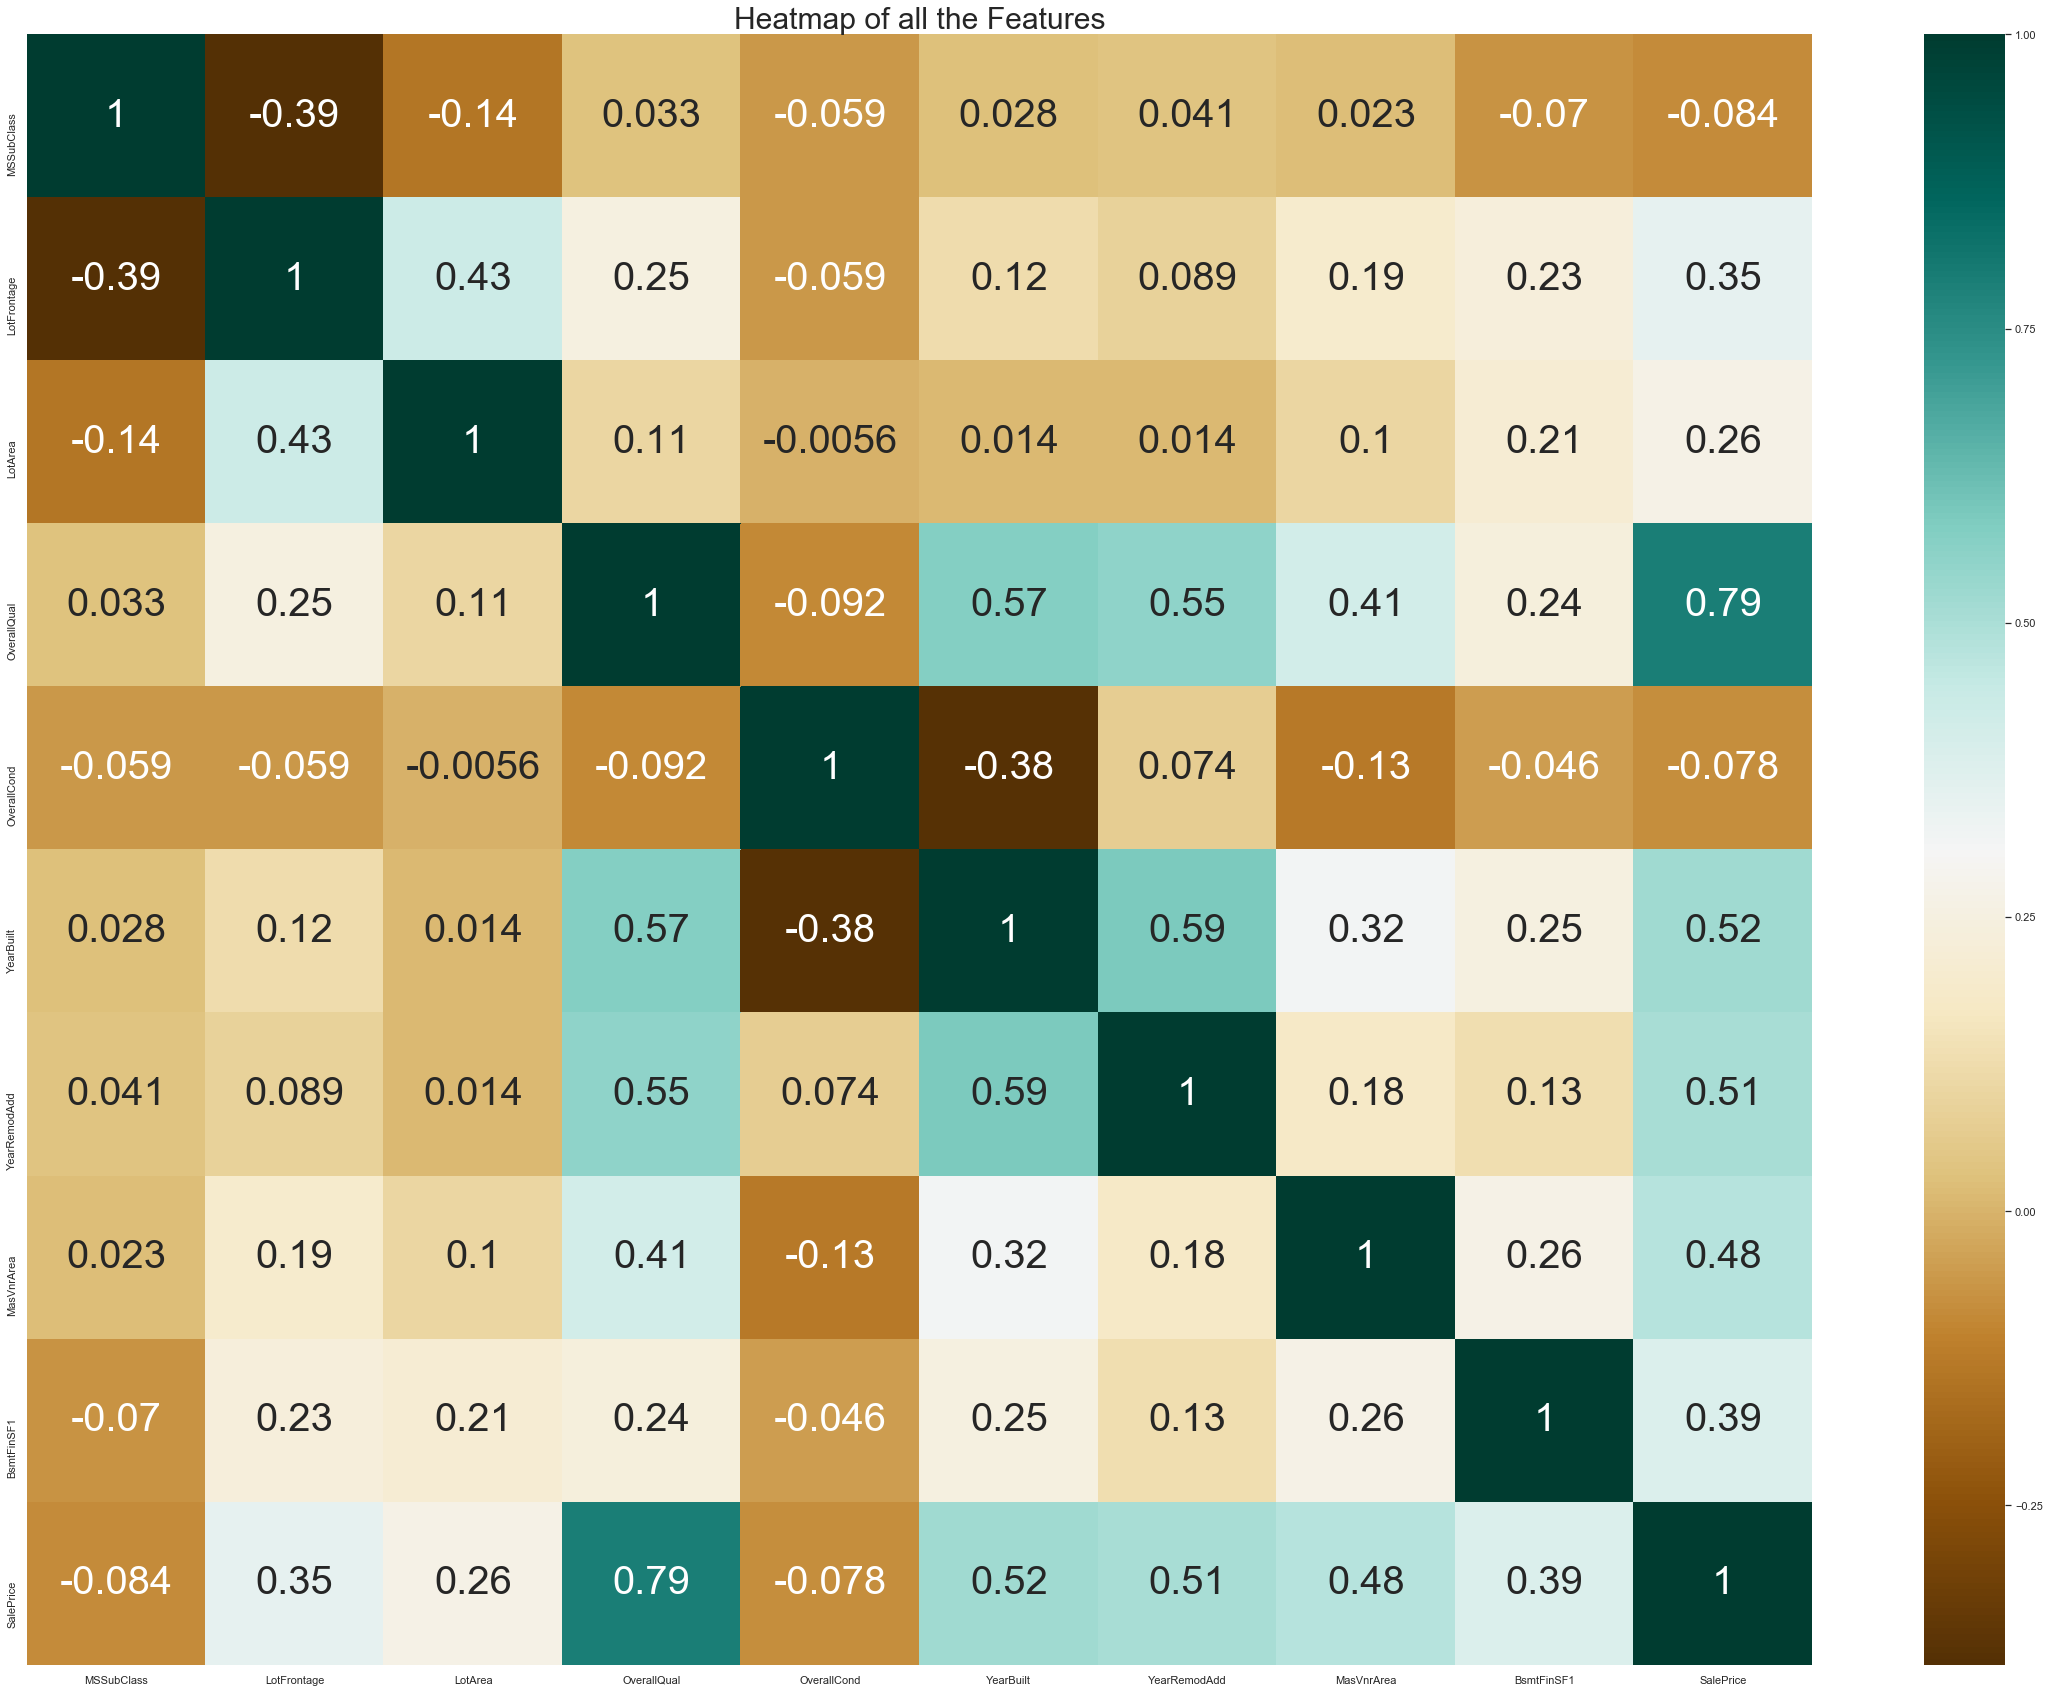

In [161]:
plt.subplots(figsize = (40,30))
sns.set(font_scale=1)
sns.heatmap(train_df[['MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','SalePrice']].corr(),cmap='BrBG',annot=True,annot_kws={"size":40})
# 为什么要选这些数据画heatmap？随机选择大约前20个
plt.title("Heatmap of all the Features", fontsize = 30)
#每个数字是对应的横竖坐标上两个变量的相关性，文字无法进行相关性计算，所以图表中其实是少了一部分变量的。

### 2.观察并初步处理空缺值<a id="129"></a>

***找到存在缺失值的数据类别，并计总数***

In [162]:
train_df.isnull().sum() 

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchS

In [163]:
train_df.shape, len(train_df)

((1460, 82), 1460)

***定义并求出缺失值的百分比，将得到的数据附在原有数据列之后***

In [164]:
train_df_na = (train_df.isnull().sum())/len(train_df)*100#缺失值的百分比=缺失的个数／全部数据的总数
train_df_na = train_df_na.drop(train_df_na[train_df_na == 0].index).sort_values(ascending=False)[:30] #排序sort，ascending=false从大到小降序排列
#drop：去掉train-df-na值为0的数据，只看有缺失值的数据有哪些以及其在总数的占比
missing_data = pd.DataFrame({'Missing Ratio' :train_df_na}) #创建一个dataframe并命名为missing ratio，名字放前面数据放后面
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


***将上述求得的缺失值百分比进行数据可视化处理，用柱状图的形式直观的表现出来***

Text(0.5,1,'Percent missing data by feature')

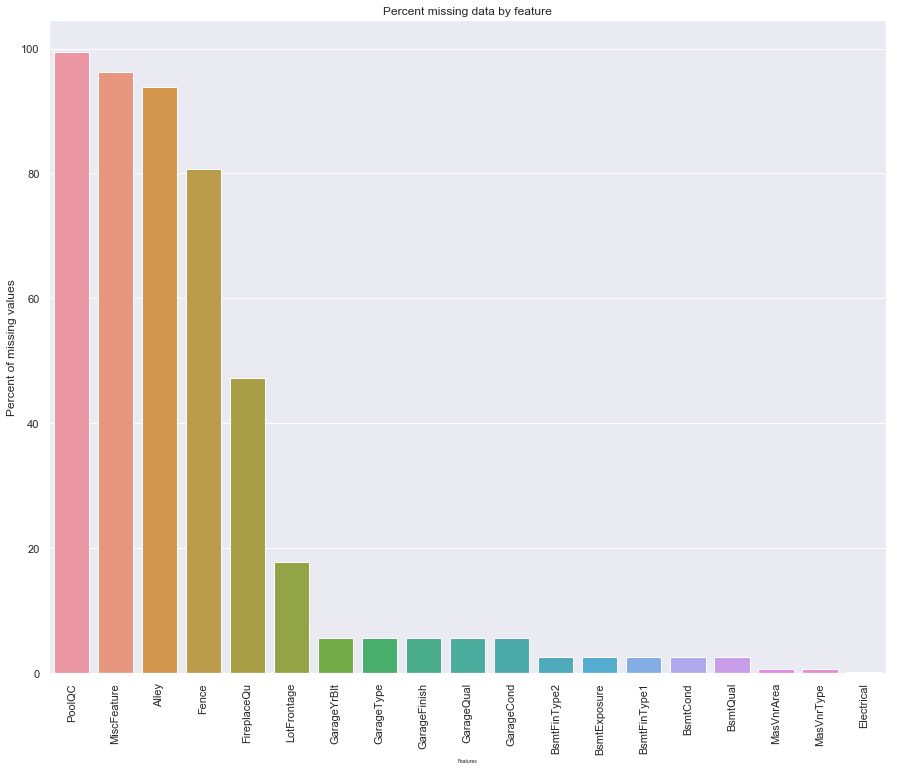

In [165]:
f,ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')#横着的看不清，旋转90度，数过来
sns.set(font_scale=1)
sns.barplot(x=train_df_na.index, y=train_df_na) #画barplot图像
plt.xlabel('Features', fontsize=5)
plt.ylabel('Percent of missing values') #y轴式比例
plt.title('Percent missing data by feature')

### 3.填充缺失数据<a id="139"></a>

#### 针对不同的数据缺失原因，对空缺值进行分类别填充

***数据缺失原因(1) ：没有相关设施***

In [166]:
train_df['PoolQC'] = train_df['PoolQC'].fillna("None") #缺失是因为没有泳池，填充none，不同的原因要有不同的填充方式。

In [167]:
train_df[['MiscFeature','Alley','Fence','FireplaceQu']].isnull().sum() #看缺失的数目有多少

MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [168]:
lst = ['MiscFeature','Alley','Fence','FireplaceQu']#同种类型的缺失
for v in lst:
    print(v)
    train_df[v] = train_df[v].fillna("None") #缺失数据的原因也是因为没有这些设施，用for循环对这四个变量进行填充

MiscFeature
Alley
Fence
FireplaceQu


In [169]:
lst=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for v in lst:
    print(v)
    train_df[v] = train_df[v].fillna("None") # 空缺值填充none

GarageType
GarageFinish
GarageQual
GarageCond


In [170]:
train_df.isnull().sum().sum()

544

***数据缺失原因(2) ：数据对应的数值为0***

In [171]:
lst = ['GarageYrBlt', 'GarageArea', 'GarageCars']
for v in lst:
    print(v)
    train_df[v] = train_df[v].fillna(0) # 空缺值填0，数目没有，面积为0

GarageYrBlt
GarageArea
GarageCars


In [172]:
lst = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for v in lst:
    print(v)
    train_df[v] = train_df[v].fillna(0) #数目没有，面积为0

BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath


In [173]:
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0) #面积为0，因为是数字

***数据缺失原因(3) ：没能成功统计到这一分类下数据的全部信息（但数据可按一定规律进行分组划分）***

In [174]:
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))
# 对于每个相同区域中，街道一定是非常相似的，因此我们先把所有的数据用neibourhood划分，取每个住宅区的变量lotfrontage的中间值
#如果有缺失，则用之前求的中间值按照街区来填充

In [175]:
train_df.groupby('Neighborhood')['LotFrontage'].median() #观察一下每个neibourhood取得的otfrontage的中间值都分别是多少

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

***数据缺失原因(4) ：有缺失的数据对应的类型不是数值-填充none***

In [176]:
lst=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for v in lst:
    print(v)
    train_df[v] = train_df[v].fillna("None") #因为缺失值并不是数据，所以不能填0

BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2


In [177]:
train_df.isnull().sum().sum()#看一下还有哪些缺失数据的变量是还没有填充上的，并计总数

9

In [178]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')#不是数字，是墙面的材料，不能填0

***数据缺失原因(5) ：这一类别下的数据中的缺失值非常少，并且不清楚缺失值类型的，填充这一类别下出现最多次数的数据内容***

In [179]:
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])
#因为只有一个缺失值，不知道缺失的是什么，填充的是mode：所有这一类型的数据中出现的次数最多的、最常见的

In [180]:
train_df['Electrical'].mode()[0] #[0] 使得data type是能够是string，字符串; 如果没有[0] 的话就是object，与其他的数据类型不一样。

'SBrkr'

(array([  1.,   5.,  25.,  57.,   0., 821., 252., 205.,  72.,  22.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

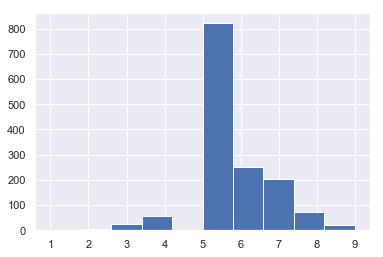

In [181]:
plt.hist(train_df['OverallCond'])

### 4.清理数据格式--统一数据类型<a id="149"></a>

***文字转换成数字，便于之后的模型计算***

In [182]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64


In [183]:
train_df['MSSubClass'].dtypes

dtype('int64')

In [184]:
train_df.dtypes.value_counts()

object     43
int64      35
float64     4
dtype: int64

In [185]:
train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
train_df['OverallCond'] = train_df['OverallCond'].astype(str)
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)


### 5.LabelEncoder处理数据<a id="159"></a>

***labelencoder的作用是把分类变量转化成数字，以便于后续在模型中进行运用-数据相当于是0，1，2，3...，数据的数量和分类变量的种类相同。例如：***

In [186]:
train_df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

***MSZoning 有五个不同的种类，所以会转换成0，1，2，3，4，如下：***

In [187]:
from sklearn.preprocessing import LabelEncoder
cols =  ('MSZoning','FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [188]:
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_df[c].values))
    #print(train_df[c].value_counts())
    train_df[c] = lbl.transform(list(train_df[c].values))
    #print(train_df[c].value_counts())

In [189]:
train_df['MSZoning'].unique()

array([3, 4, 0, 1, 2])

### 6.OneHotEncoder处理数据<a id="169"></a>

***在使用onehot encoder处理数据的过程中：变量对应的种类的数目即为矩阵的列数***

In [190]:
sample = ['a','b','c','a']
pd.get_dummies(sample)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [191]:
all_data = pd.get_dummies(train_df)

In [192]:
train_df.shape

(1460, 82)

***进行onehot encoder之后得到结果如下：***

In [193]:
all_data.shape

(1460, 221)

In [194]:
all_data.head()#all data是转换之后的数据，展示一下

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,3,65.0,8450,1,1,3,0,7,4,2003,2003,196.0,2,4,2,4,3,2,706,6,0,150,856,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,2003.0,2,2,548,5,5,2,0,61,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,4,3,80.0,9600,1,1,3,0,6,7,1976,1976,0.0,3,4,2,4,1,0,978,6,0,284,1262,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1976.0,2,2,460,5,5,2,298,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,9,3,68.0,11250,1,1,0,0,7,4,2001,2002,162.0,2,4,2,4,2,2,486,6,0,434,920,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2001.0,2,2,608,5,5,2,0,42,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,10,3,60.0,9550,1,1,0,0,7,4,1915,1970,0.0,3,4,4,1,3,0,216,6,0,540,756,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,1998.0,3,3,642,5,5,2,0,35,...,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,9,3,84.0,14260,1,1,0,0,8,4,2000,2000,350.0,2,4,2,4,0,2,655,6,0,490,1145,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2000.0,2,3,836,5,5,2,192,84,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [195]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log,totalSF
0,9,3,65.0,8450,1,1,3,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706,6,0,150,856,GasA,0,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal,208500,12.247699,2566
1,4,3,80.0,9600,1,1,3,Lvl,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978,6,0,284,1262,GasA,0,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal,181500,12.109016,2524
2,9,3,68.0,11250,1,1,0,Lvl,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486,6,0,434,920,GasA,0,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal,223500,12.317171,2706
3,10,3,60.0,9550,1,1,0,Lvl,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216,6,0,540,756,GasA,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml,140000,11.849405,2473
4,9,3,84.0,14260,1,1,0,Lvl,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655,6,0,490,1145,GasA,0,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal,250000,12.429220,3343


***选出我们所需要的所有自变量和因变量***

In [196]:
all_features = all_data.columns.tolist()
y = all_data.SalePrice_log
x_feature = list(set(all_features) - set(['SalePrice','SalePrice_log']))
all_x = all_data[x_feature]

In [197]:
all_x.shape

(1460, 219)

In [198]:
y.shape

(1460,)

### 7. train test split<a id="179"></a>

***我们在train-test数据集中，将20%的数据设定成为test集，另80%为train集***

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
xTrain, xTest, yTrain, yTest = train_test_split(all_x,y,test_size = 0.2, random_state = 0)

## 五、数据需求&特征工程<a id="222"></a>

<a id="0"></a>
### 用numpy实现线性回归和逻辑回归-深层理解模型
#### [模型一:线性模型-简例说明](#1111)
#### [模型二:逻辑回归模型-拓展模型](#2222)
#### [模型三:决策树, 随机森林模型](#3333)


### 模型 一、线性模型-简例说明<a id="1111"></a>

<a id="0"></a>
> 1.[观察数据集 yTest, yTrain](#219)<br>
> 2.[用梯度下降来实现线性模型](#229)<br>
> 3.[赋值并画出图像展示](#239)<br>

### 1. 观察数据集 yTest, yTrain
<a id="219"></a>

***通过观察ytest,ytrain两个数据集中的平均值是否相差不多，来确定两个数据集中的数据分布是较为平均的，因此不会造成较大偏差***

In [202]:
yTrain.shape, 

((1168,),)

In [203]:
yTest.shape, 

((292,),)

In [204]:
yTest.mean(), 

(12.026840168188993,)

In [205]:
yTest.mean()

12.026840168188993

### 2. 用梯度下降来实现线性模型—以一个简例说明
<a id="229"></a>

***用简单的例子实现线性模型，如下：设一组x,y值，并用散点图表示如下图所示：***

In [206]:
x = [2,2,3,3,4,5,6,7]
y = [4,5,4,7,5,9,8,13]

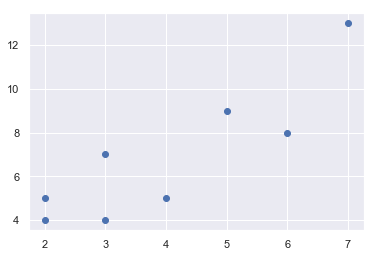

In [207]:
plt.scatter(x,y)

***预测x,y的线性关系为predict-y=ax+b***

In [208]:
def predict(x, a, b):
    return x*a + b

***minimize (y-a*x-b)^2 找到一条线能使得这个平方值最小 ***

In [209]:
def cost_function(x, y, a, b):
    x_len = len(x)# x值对应的位置编号 第0，1，2...8个
    total_error = 0.0 #数字随意
    for i in range(x_len):
        total_error += (y[i] - (a*x[i] + b))**2#用原来的值加上added error替换原值
    return total_error / x_len #求一个百分比比值

***利用模型求出线性关系中的系数a,b的值<br>
对a求导：a >> -2（y - (ax+b))x<br>
对b求导：b >> -2（y - (ax+b))1***


In [210]:
def update_weights(x, y, a, b, learning_rate):
    a_deriv = 0
    b_deriv = 0
    x_len = len(x)

    for i in range(x_len):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        a_deriv += -2*x[i] * (y[i] - (a*x[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(y[i] - (a*x[i] + b))
        #print(a_deriv, b_deriv)

    # We subtract because the derivatives point in direction of steepest ascent
    a -= (a_deriv / x_len) * learning_rate
    b -= (b_deriv / x_len) * learning_rate
    #print('a and b are',a,b)

    return a, b

In [211]:
def train(x, y, a, b, learning_rate,iters):
    cost_history = []

    for i in range(iters):
        a,b = update_weights(x, y, a, b, learning_rate)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, a, b)
        cost_history.append(cost)#将新得到的数据cost_history附在cost的原有数据列后

        # Log Progress
        if i % 10 == 0:
            print ("iter={:d}    weight={:.2f}    bias={:.4f}    cost={:.2}".format(i, a,b, cost))
            pred_y = []
            for s in x:
                pred_y.append(a*s + b)#把得到的新数据y predict,附在原来ax+b数据列之
            plt.plot(x,pred_y, label='%d'%i)
           # plt.legend()
    plt.scatter(x,y,label='real')
    plt.legend(loc='best')
#     return a,b, cost_history

### 3.赋值并画出图像展示：<a id="239"></a>
***x,y从0，0开始取值，learning rate=0.0007, iters=50***

iter=0    weight=0.04    bias=0.0096    cost=5.3e+01
iter=10    weight=0.43    bias=0.0925    cost=3.1e+01
iter=20    weight=0.72    bias=0.1554    cost=1.8e+01
iter=30    weight=0.94    bias=0.2033    cost=1.1e+01
iter=40    weight=1.10    bias=0.2397    cost=7.4


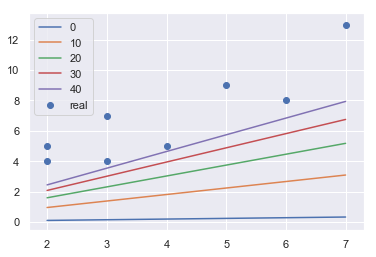

In [212]:
train(x,y,0,0,0.0007,50)

### 模型二、逻辑回归 Logistic regression-拓展模型<a id="2222"></a> 

>* p = 1/(1 + e^-z) <br>
>* z = ax + b

In [83]:
import numpy as np

***设x,y的值如下：***

In [84]:
x1 = [5,4,5,3,6,7,8,9,7,10]
x2 = [3,2,4,3,1,5,8,4,6,7]
x = [[x1[i],x2[i]] for i in range(len(x1))]
y = np.array([0,0,0,0,0,1,1,1,1,1])

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict(features, weights):
    
    features = np.array(features)
    weights = np.array(weights)
    z = np.sum(np.dot(features, weights))
    #print('z is',z)
    return sigmoid(z)

def cost_function(features, labels, weights):

    observations = len(labels)
    predictions = predict(features, weights)
    #print (predictions, type(predictions),np.log(predictions))
    
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)
    #print ('class1 cost',class1_cost)
    #Take the error when label=0
    class2_cost = -(1-labels)*np.log(1-predictions)
    #print ('class2 cost',class2_cost)
    #Take the sum of both costs
    cost = class1_cost + class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost



def update_weights(features, labels, weights, lr):

  
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    gradient = np.dot(np.array(features).T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    weights = np.array(weights)
    weights = weights.reshape((weights.shape[0],))
    #5 - Subtract from our weights to minimize cost
    weights = np.array(weights) -  np.array(gradient)

    return weights

def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        #print('fist weights',weights)
        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))
        #print ('weights',weights)    

    return weights, cost_history

***得到对应的x,y在采用逻辑回归模型后的值***

In [85]:
train(x,y,[[0.1],[0.1]],0.012,100)

iter: 0 cost: 4.1317382770097
iter: 10 cost: 0.74408976549307
iter: 20 cost: 0.7459938021470576
iter: 30 cost: 0.7460063718090391
iter: 40 cost: 0.746006453818149
iter: 50 cost: 0.7460064543531658
iter: 60 cost: 0.7460064543566564
iter: 70 cost: 0.7460064543566791
iter: 80 cost: 0.7460064543566793
iter: 90 cost: 0.7460064543566789


(array([-0.14439596,  0.23017146]),
 [4.1317382770097,
  2.9167408955916962,
  1.738138492420291,
  0.8638273951676094,
  0.7143795905702228,
  0.7741836833647326,
  0.732687196467706,
  0.7552822573673863,
  0.7408679096174534,
  0.7492789066653164,
  0.74408976549307,
  0.7471875405579569,
  0.7453006081094873,
  0.7464361793322529,
  0.7457477480634231,
  0.7461632613741223,
  0.7459117988702397,
  0.7460637341358485,
  0.7459718439358373,
  0.7460273861010973,
  0.7459938021470576,
  0.7460141045247617,
  0.7460018296016444,
  0.7460092504972012,
  0.7460047639254348,
  0.7460074763668532,
  0.7460058364806806,
  0.746006827911586,
  0.7460062285153997,
  0.7460065908950663,
  0.7460063718090391,
  0.7460065042629929,
  0.746006424184564,
  0.7460064725980033,
  0.7460064433284248,
  0.746006461024091,
  0.746006450325726,
  0.7460064567936942,
  0.7460064528833197,
  0.746006455247436,
  0.746006453818149,
  0.7460064546822611,
  0.7460064541598402,
  0.746006454475683,
  0.746006

### 模型三、 决策树, 随机森林模型 <a id="3333"></a>  

<a id="0"></a>
> 1.[模型优势](#319)<br>
> 2.[模型不足](#329)<br>
> 3.[对模型中的关键-entropy的解释](#339)<br>

#### 1.模型优势<a id="319"></a> ：
***Advantage 1:*** Decision trees implicitly perform variable screening or feature selection<br>
***Advantage 2:*** Decision trees require relatively little effort from users for data preparation<br>
***Advantage 3:*** Nonlinear relationships between parameters do not affect tree performance<br>
***Advantage 4:*** The best feature of using trees for analytics - easy to interpret and explain to executives<br>

#### 2.模型不足<a id="329"></a> ：
 ***Disadvantage 1:*** Too much cost<br>
 ***Disadvantage 2:*** Not stable<br>
 ***Disadvantage 3:*** Too complex<br>

#### 3.对模型中的关键-entropy的解释<a id="339"></a> ：
Information entropy is the average rate at which information is produced by a stochastic source of data

## 第六步:选取模型

<a id="0"></a>
> 1.[求出不同模型的误差值(mean squared error)](#419)<br>
> 2.[用kfold进行交叉验证](#429)<br>
> 3.[用GridSearchCV和RandomizedSearchCV验证不同模型对数据的运行情况](#439)<br>

### 1.求出各模型的MSE<a id="419"></a> 

***分别求出利用不同模型得到的mean squared error，即模型误差值的大小***

In [223]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

Lasso L1
Cost function = ∑( Ŷi– Yi)2 + λ∑ |β|<br>

Ridge L2
Cost function = ∑( Ŷi– Yi)2 + λ∑ β^2<br>

ElasticNet
Cost function = ∑( Ŷi– Yi)2 + a∑ |β| + (1-a)∑ β^2<br>

In [224]:
lr = LinearRegression()
lr.fit(xTrain, yTrain)
y_pred_lr = lr.predict(xTest)
lr_mse = mean_squared_error(y_pred, yTest)
print('Mean square error for linear regression is',lr_mse)

Mean square error for linear regression is 0.0655088084905781


In [225]:
reg = Ridge()
reg.fit(xTrain,yTrain) 
y_pred = reg.predict(xTest)
reg_mse = mean_squared_error(y_pred, yTest)
print('Mean square error for ridge is',reg_mse)

Mean square error for ridge is 0.04282389847606157


In [226]:
las = Lasso()
las.fit(xTrain, yTrain)
y_pred = las.predict(xTest)
las_mse = mean_squared_error(y_pred, yTest)
print('Mean square error for lasso is',las_mse)

Mean square error for lasso is 0.07074567415013627


In [227]:
els_model = ElasticNet()
els_model.fit(xTrain,yTrain)
y_pred = els_model.predict(xTest)
els_mse = mean_squared_error(y_pred, yTest)
print('Mean square error for ElasticNe is',las_mse)

Mean square error for ElasticNe is 0.07074567415013627


In [228]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import KFold

In [229]:
rf = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=3)
rf.fit(xTrain,yTrain)
yTrain_pred_rf = rf.predict(xTrain)
mean_squared_error(y_pred, yTest)

0.0655088084905781

In [230]:
gb = GradientBoostingRegressor()
gb.fit(xTrain,yTrain)
yTrain_pred_gb = gb.predict(xTrain)
mean_squared_error(y_pred, yTest)

0.0655088084905781

### 2.用kfold进行交叉验证<a id="429"></a> 

***利用交叉验证让使得train test集中的数据能够在不同的模型中被更加充分的验证***

In [235]:
def CVKFold(k, X, y, model):
    # Random seed: reproducibility
    np.random.seed(1)

    # accuracy score 
    train_error = [0 for i in range(k)] 
    test_error = [0 for i in range(k)] 
   
    # index
    idx = 0
    
    # CV loop
    kf = KFold(n_splits = k, shuffle = True)   
    # Generate the sets
    for train_index, test_index in kf.split(X):
        
        # Iteration number
        #print(train_index,len(train_index))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]    
        
        if model == 'rf':
            my_model = RandomForestRegressor()
        if model == 'gb':
            my_model = GradientBoostingRegressor()
        if model == 'linear':
            my_model = LinearRegression()
        my_model = my_model.fit(X_train,y_train)
        yTrain_pred = my_model.predict(X_train)
        yTest_pred = my_model.predict(X_test)
        train_error[idx] =  mean_squared_error(y_train,yTrain_pred)
        test_error[idx] = mean_squared_error(y_test,yTest_pred)
        idx +=1
    print (train_error,np.mean(train_error))
    print (test_error,np.mean(test_error))     
    

In [236]:
CVKFold(10,xTrain,yTrain,'linear')

[0.009051769642339776, 0.008937982326215899, 0.008520810715976924, 0.008420195258649503, 0.009174868886217435, 0.008209091941798084, 0.008393801071183269, 0.008848668056566379, 0.008824966478812878, 0.00885648088806765] 0.00872386352658278
[0.010290608614293952, 0.015327728141474607, 0.04281872644918332, 0.01908339279962769, 0.01169797530905854, 0.019565543159820325, 0.018429613408582794, 0.01492520786497204, 0.013713195039274055, 0.016837984075552762] 0.01826899748618401


In [237]:
CVKFold(10,xTrain,yTrain,'rf')

[0.004117759544841758, 0.003886342273450703, 0.004308842208808269, 0.004351268272718308, 0.003916538772269806, 0.00407599918642415, 0.004021943846731927, 0.004318930387063788, 0.004237165966692864, 0.003931574668762309] 0.004116636512776389
[0.016314570187149817, 0.021885996716080564, 0.03583117568237754, 0.026958834326689805, 0.01436261082166005, 0.02486645335515255, 0.02087208017748959, 0.01599463096475317, 0.0218614308980725, 0.021602855280709123] 0.022055063841013474


In [238]:
CVKFold(10,xTrain,yTrain,'gb')

[0.005828887826901767, 0.005234591102402745, 0.005317141570875592, 0.005328328727137058, 0.005573639363519261, 0.0053366485761945906, 0.005083641891943919, 0.005199082369365912, 0.0055403100521936345, 0.005414079861398392] 0.005385635134193287
[0.01324261052851975, 0.014980485185449718, 0.03468806233443981, 0.021527444152199156, 0.01024067702002328, 0.019394690580489128, 0.019191111782628886, 0.012112528330567253, 0.01771047322093763, 0.013206227877312385] 0.0176294311012567


### 3.用GridSearchCV和RandomizedSearchCV验证不同模型对数据的运行情况<a id="439"></a> 

***GridSearchCV是将给定的参数按照所能排列出来的所有组合对数据进行多次验证；而RandomizedSearchCV则是在给定的参数中随机选择，并将数据在这些随机的参数组合确定的模型中按照给定的最大运行次数进行验证。***


In [108]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features' : [50,70,100,200],
    'min_samples_split':[2,3,5,10],
    'n_estimators': [5,10,20]
}

param_grid['n_estimators']

[5, 10, 20]

In [109]:
rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3)

rf_grid.fit(xTrain,yTrain)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 10], 'max_features': [50, 70, 100, 200], 'min_samples_split': [2, 3, 5, 10], 'n_estimators': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
rf_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [111]:
random_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=3,n_iter=50)

random_rf.fit(xTrain,yTrain)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'max_depth': [5, 7, 10], 'max_features': [50, 70, 100, 200], 'min_samples_split': [2, 3, 5, 10], 'n_estimators': [5, 10, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [112]:
random_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=50, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## 八、衡量结果-可视化<a id="555"></a>

In [113]:
import graphviz
from sklearn import tree

In [114]:
rf = RandomForestRegressor(max_depth=5,min_samples_split=2)

In [115]:
rf.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [116]:
rf_1 = rf.estimators_[0]

In [124]:
rf_1

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2053678366, splitter='best')

In [248]:
dot_data = tree.export_graphviz(rf_1, feature_names=xTrain.columns,filled=True,rounded=True,out_file = None)

In [127]:
graph = graphviz.Source(dot_data)

In [129]:
graph.render('tree')

'tree.pdf'

***利用随机森林模型得到的数据可视化图像如下图：***

In [241]:
rf = RandomForestRegressor(max_depth=4,min_samples_split=3)

In [ ]:
rf.fit(xTrain,yTrain)

In [ ]:
dot_data = tree.export_graphviz(rf_1, feature_names=xTrain.columns,filled=True,rounded=True,out_file = None)

## 第十二课

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
pred 0 true 1 > 10
pred 1 true 0 > 10
total 100
accuracy =80%
balanced_accuracy = 10*0.3 + 10*0.7

In [ ]:
xTrain.shape

In [ ]:
xTrain.head()

In [ ]:
rf = RandomForestRegressor()
linear = LinearRegression()
gb = GradientBoostingRegressor()

In [ ]:
#new_prediction = rf * 0.5 + linear*0.3 + gb*0.2